# Report 1 Content

## Import Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Pre-Processing

In [2]:
product_attribute = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Cleaned Data/Product Attributes.xlsx')
fz_meat = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2020.xlsx')
fz_meat2 = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2021.xlsx')
fz_meat3 = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2022.xlsx')
fz_meat4 = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2023.xlsx')
fz_meat5 = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Data/Data/Fz_Rfg Substitute Meat_POS_2024.xlsx')

In [3]:
product_attribute.head()

,Product,UPC 13 digit,Aisle Name,Category Name,Sub-Category Name,Manufacturer Name,Brand Franchise Name,Brand Name,Package,Total Count,Total Ounces,Form,Flavor / Scent,Meat Source,Product Type,Type Of Meat Substituted,Type Of Substitute,Cooked Info
0,AL SAFA HALAL FROZEN BEEF HOTDOG 12.6 OZ - 062...,624967436101,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,AL SAFA HALAL,AL SAFA HALAL,AL SAFA HALAL,VACUUM PACKED,8.0,12.6,NaN,REGULAR,BEEF,HOT DOG,NaN,NaN,NaN
1,AL SAFA HALAL FROZEN CHICKEN FRANKFURTER 12 OZ...,624967508101,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,AL SAFA HALAL,AL SAFA HALAL,AL SAFA HALAL,VACUUM PACKED,6.0,12.0,NaN,REGULAR,CHICKEN,FRANKFURTER,NaN,NaN,NaN
2,CLOVERDALE MEATS FROZEN BEEF AND PORK FRANKFUR...,76829017602,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,CLOVERDALE FOODS CO,CLOVERDALE,CLOVERDALE MEATS,BOX,40.0,160.0,NaN,REGULAR,BEEF AND PORK,FRANKFURTER,NaN,NaN,NaN
3,COUNTRY FRESH MEATS FROZEN PORK AND BEEF HOTDO...,829905000521,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,COUNTRY FRESH MEATS INC,COUNTRY FRESH MEATS,COUNTRY FRESH MEATS,VACUUM PACKED,8.0,16.0,NaN,COLBY CHEESE,PORK AND BEEF,HOT DOG,NaN,NaN,NaN
4,NOBRAND FROZEN BEEF HOTDOG 80 OZ - 0694022680771,694022680771,AISLE-FROZEN MEAT/POULTRY/SEAFOOD,MEAT - FZ,FZ FRANKFURTERS,FAIR MARKET INC,NOBRAND,NOBRAND,BOX,20.0,80.0,NaN,CHEDDAR JALAPENO,BEEF,HOT DOG,NaN,NaN,NaN


In [4]:
fz_meat.count()

Geography                                          221397
Time                                               221397
Product                                            221397
UPC 13 digit                                       221397
Unit Sales                                         221397
Unit Sales No Merch                                217766
Unit Sales Any Merch                               143217
Unit Sales Price Reductions Only                   137308
Unit Sales Feature Only                             25455
Unit Sales Display Only                             38319
Unit Sales Special Pack Only                            0
Unit Sales Feature and Display                       4936
Volume Sales                                       221397
Volume Sales No Merch                              217766
Volume Sales Any Merch                             143217
Volume Sales Price Reductions Only                 137308
Volume Sales Feature Only                           25455
Volume Sales D

In [5]:
# Imputation
def imputation_process(row):
    row['Incremental Units'] = row['Unit Sales'] - row['Base Unit Sales']
    row['Incremental Volume'] = row['Volume Sales'] - row['Base Volume Sales']
    row['Incremental Dollars'] = row['Dollar Sales'] - row['Base Dollar Sales']
    return row

# Split Geography column and only save its location
def extract_location(col):
    return col.split(' - ')[0]

# convert time into year month and day
def parse_time(col):
    # Year, month, day
    sep_data = col.split('-')
    year = int('20' + sep_data[2])
    month = int(sep_data[0][-2:])
    day = int(sep_data[1])
    # Quarter of given date
    quarter = (month - 1) // 3 + 1
    return pd.Series([year, quarter, month], index = ['Year', 'Quarter', 'Month'])

# Split product column and only save company name and product name
def parse_product(col):  
    return col.split(' - ')[0]


# Based on length of company name, select product name
def extract_product_name(full_string, brand_name):
    brand_name_length = len(brand_name)
    words = full_string[brand_name_length:].strip()
    return words

# # Arrange columns order
def change_column_order(df):
    final_order = [
        'Geography', 'Year', 'Quarter', 'Month', 'Season', 'Form', 'Manufacturer Name',
        'Brand Name', 'Product Name', 'Flavor / Scent', 'Meat Source',
        'Unit Sales', 'Volume Sales', 'Dollar Sales', 'Price per Unit', 
        'Price per Volume', 'Base Unit Sales', 'Base Volume Sales', 'Base Dollar Sales',
        'Incremental Units', 'Incremental Volume', 'Incremental Dollars', 
        'ACV Weighted Distribution'
    ]
    return df[final_order]

def merge_content(df1, df2):
    combined = df1.merge(df2, how = 'left', on = 'Product')
    return combined

def map_season(month):
    # Northern Hemisphere standard mapping
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'


# Full tranform process
def transform_data(df, df2):
    table1 = merge_content(df, df2)
    # Used customized function
    table1['Geography'] = table1['Geography'].map(extract_location)
    table1[['Year', 'Quarter', 'Month']] = table1['Time'].apply(parse_time)
    table1['Product'] = table1['Product'].map(parse_product)
    table1['Product Name'] = table1.apply(lambda row: extract_product_name(row['Product'], row['Brand Name']), axis=1)
    #df['Product Name'] = df.apply(extract_product_name(df['Product'], df['Brand']), axis = 1)
    
    # Mapping quarter to seasonality
    table1['Season'] = table1['Month'].apply(map_season)
    # Change column order
    transformed = change_column_order(table1).apply(imputation_process, axis = 1)
    return transformed

In [6]:
combined = transform_data(fz_meat, product_attribute)
combined2 = transform_data(fz_meat2, product_attribute)
combined3 = transform_data(fz_meat3, product_attribute)
combined4 = transform_data(fz_meat4, product_attribute)
combined5 = transform_data(fz_meat5, product_attribute)

In [7]:
full_fz_rfg_sub = pd.concat([combined, combined2, combined3, combined4, combined5])

In [8]:
# output_file = '/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/full_fz_rfg_sub.csv'
# full_fz_rfg_sub.to_csv(output_file, index=False)

In [9]:
#test = fz_meat.merge(product_attribute, how = 'left', on = 'Product')
full_fz_rfg_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991780 entries, 0 to 12727
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Geography                  991780 non-null  object 
 1   Year                       991780 non-null  int64  
 2   Quarter                    991780 non-null  int64  
 3   Month                      991780 non-null  int64  
 4   Season                     991780 non-null  object 
 5   Form                       991780 non-null  object 
 6   Manufacturer Name          991780 non-null  object 
 7   Brand Name                 991780 non-null  object 
 8   Product Name               991780 non-null  object 
 9   Flavor / Scent             991780 non-null  object 
 10  Meat Source                0 non-null       float64
 11  Unit Sales                 991780 non-null  float64
 12  Volume Sales               991780 non-null  float64
 13  Dollar Sales               991780 n

In [10]:
full_fz_rfg_sub['Form'].unique()

array(['GROUND', 'BALL', 'BURGER PATTY', 'CRUMBLE', 'PATTY', 'BURGER',
       'LINK', 'MEATBALL', 'PIECE', 'SLICED', 'STEAK', 'SPARE RIBS',
       'CHUNK', 'TIP', 'SLICE', 'BREAKFAST PATTY', 'FILET', 'SLIDER',
       'CAKE', 'STRIP', 'BITE', 'POPPER', 'BREAKFAST SAUSAGE PATTY',
       'HOT DOG', 'PULLED', 'BREAKFAST LINK', 'FRANK', 'ROAST', 'WHOLE',
       'STICK', 'NOT STATED ON PACKAGE', 'BLOCK', 'ROLL', 'NUGGET',
       'BREAST', 'FINGER', 'TENDER', 'WING', 'CUTLET', 'DICED', 'POPCORN',
       'DIPPER', 'BREAKFAST BITES', 'CHUB', 'DINNER SAUSAGE LINK', 'CUBE',
       'BAR', 'LOAF', 'MEAT LOAF', 'BRATWURST', 'BREAKFAST SAUSAGE ROLL',
       'SPLIT ROPE', 'ROPE', 'ULTRA THIN SLICE', 'DELI SLICED', 'CUT',
       'BREAKFAST SAUSAGE LINK', 'GIZZARD', 'RIBLET', 'SAUSAGE',
       'DINNER LINK', 'DRUMSTICK', 'FUN NUGGETS', 'SHREDS', 'SHREDDED',
       'FRIES', 'TENDERS', 'BINGS', 'SAUSAGE PATTY', 'BAO BUN'],
      dtype=object)

In [11]:
# Morningstars marketshare
# Impossible marketsharex
# Combine Gardein & Gardein ultimate plant-based dollar sales
# Percentage Sales in Tender & Nug from MORNINGSTAR FARMS INCOGMEATO & GARDEIN ULTIMATE PLANT BASED & IMPOSSIBLE (or maybe top 3 sales company)

In [12]:
# NUMERIC CORRELATION IS USELESS
# corrmat = combined[numeric_col].corr().round(2)
# top_corr_features = corrmat.index
# plt.figure(figsize=(7, 7))
# sns.heatmap(combined[top_corr_features].corr(),annot=True, square=True, fmt='.2f',
#             cbar_kws={"shrink": .80}, linewidths=.5, cmap='RdYlGn');

In [13]:
# output_file = '/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/test_merge.csv'
# combined.to_csv(output_file, index=False)

## Data Loading

In [2]:
full_fz_rfg_sub = pd.read_csv('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/full_fz_rfg_sub.csv')

## Analysis on TOP 10 Manufacture & Sales

<Figure size 1000x800 with 0 Axes>

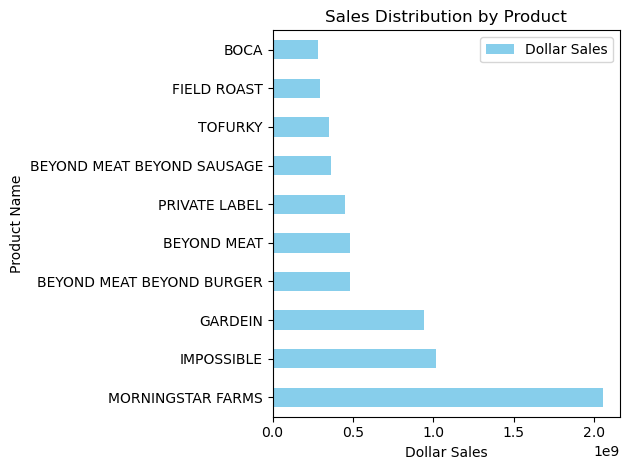

In [3]:
# Sales Distribution: Analyze the distribution of dollar sales across different manufacturers and brands to see which are the most popular or profitable.
brand_sales = full_fz_rfg_sub.groupby('Brand Name').agg({'Dollar Sales':'sum'}).sort_values('Dollar Sales', ascending = False).head(10)
brand_sales.reset_index()
#sns.barplot(data = brand_sales, x = 'Brand Name', y = 'Dollar Sales')
plt.figure(figsize=(10, 8))
brand_sales.plot(kind='barh', color='skyblue')
plt.title('Sales Distribution by Product')
plt.xlabel('Dollar Sales')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [4]:
brand_sales = combined.groupby('Brand Name')['Dollar Sales'].sum().reset_index()

total_market_sales = brand_sales['Dollar Sales'].sum()


brand_sales['Market Share (%)'] = (brand_sales['Dollar Sales'] / total_market_sales) * 100
new_brand_sales = brand_sales.sort_values('Market Share (%)', ascending = False).head(10)
brand_sales, total_market_sales
# #Pie Chart for Market Share
# plt.figure(figsize=(10, 8))
# plt.pie(new_brand_sales['Market Share (%)'], labels=new_brand_sales['Brand Name'], autopct='%1.1f%%', startangle=140)
# plt.title('Market Share by Brand (Dollar Sales)')
# #plt.show()

# #Bar Chart for Market Share
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Market Share (%)', y='Brand Name', data=new_brand_sales, palette='viridis')
# plt.title('Market Share by Brand (Dollar Sales)')
# plt.xlabel('Market Share (%)')
# plt.ylabel('Brand Name')
# #plt.show()

NameError: name 'combined' is not defined

The first three manufacture that make most sales for meat alternative is "Morningstar Farms", "Gardein", "Beyong Meat Beyond Burger"

## Analysis on Sales Distribution, Focusing on Sales Per Unit

In [12]:
no_outliers_price_descriptive_stats = full_fz_rfg_sub[full_fz_rfg_sub['Price per Unit'] < 10]

count    947324.000000
mean          5.159229
std           1.571876
min           0.010000
25%           4.014746
50%           4.938277
75%           5.990000
max           9.999656
Name: Price per Unit, dtype: float64


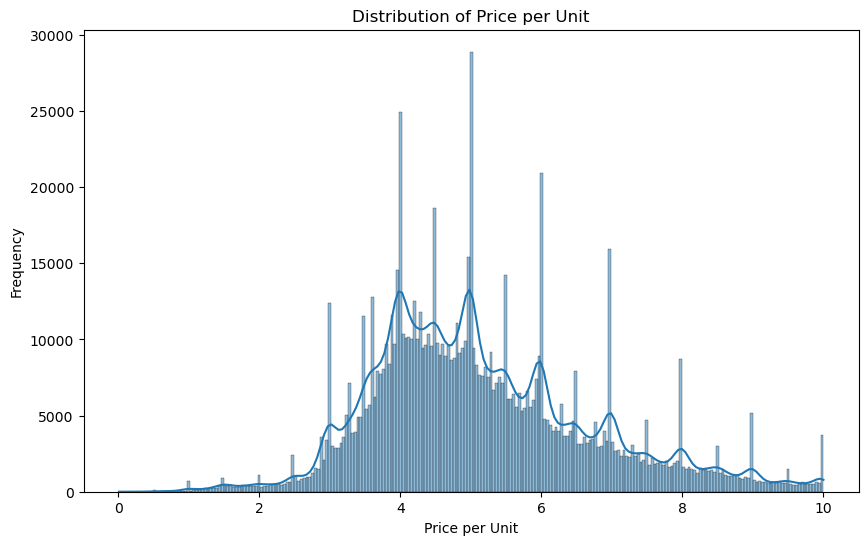

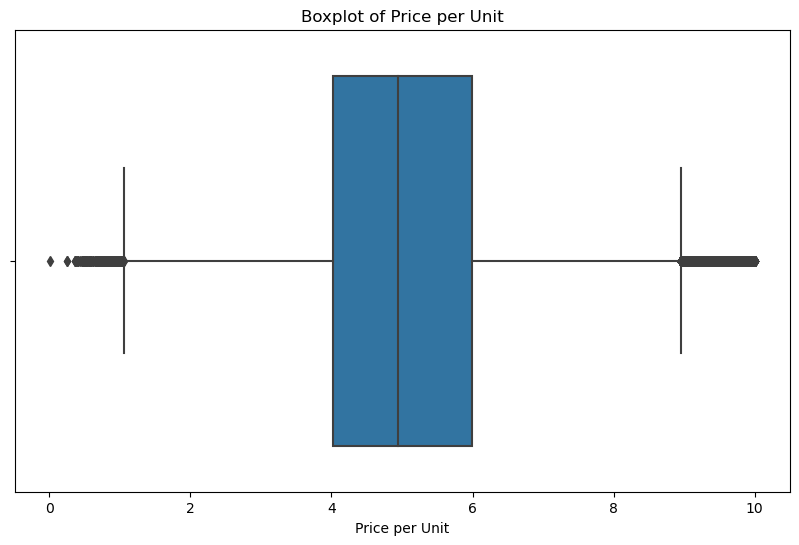

                Price per Unit  Dollar Sales
Price per Unit        1.000000      0.036067
Dollar Sales          0.036067      1.000000


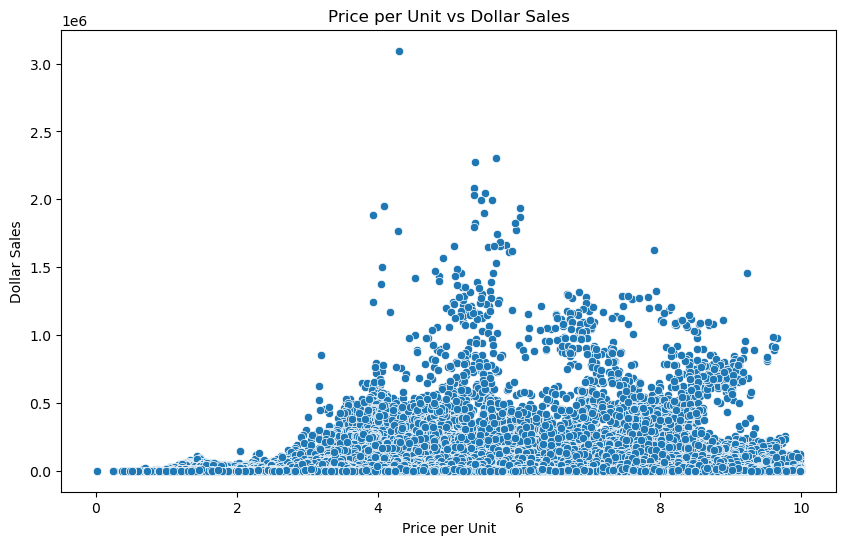

In [13]:
# Price Analysis: Study the price per unit to understand pricing strategies or to identify if there's a correlation between price and sales volume.
#price_descriptive_stats = full_fz_rfg_sub['Price per Unit'].describe()
price_descriptive_stats = no_outliers_price_descriptive_stats['Price per Unit'].describe()
print(price_descriptive_stats)

# Distribution of 'Price per Unit'
plt.figure(figsize=(10, 6))
sns.histplot(no_outliers_price_descriptive_stats['Price per Unit'], kde=True)
plt.title('Distribution of Price per Unit')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.show()

# Boxplot for 'Price per Unit'
plt.figure(figsize=(10, 6))
sns.boxplot(x=no_outliers_price_descriptive_stats['Price per Unit'])
plt.title('Boxplot of Price per Unit')
plt.xlabel('Price per Unit')
plt.show()

# Correlation analysis
correlation_matrix = no_outliers_price_descriptive_stats[['Price per Unit', 'Dollar Sales']].corr()
print(correlation_matrix)

# Scatter plot of 'Price per Unit' vs 'Dollar Sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=no_outliers_price_descriptive_stats, x='Price per Unit', y='Dollar Sales')
plt.title('Price per Unit vs Dollar Sales')
plt.xlabel('Price per Unit')
plt.ylabel('Dollar Sales')
plt.show()

It's clearly that when price of a product is between (0, 10), the sales reach high point. However, there are several product that has sales above 20, but none of their sales reach to even 1.0*1e6 unit of sales, and there are considered as outliers.
<strong>We can remove them since the amount of outliers, compared to majority of data, is less.<Strong>

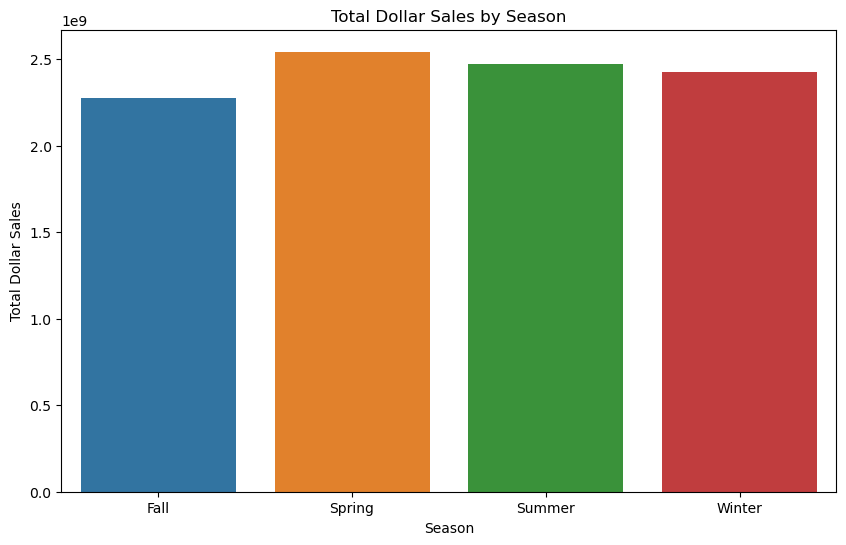

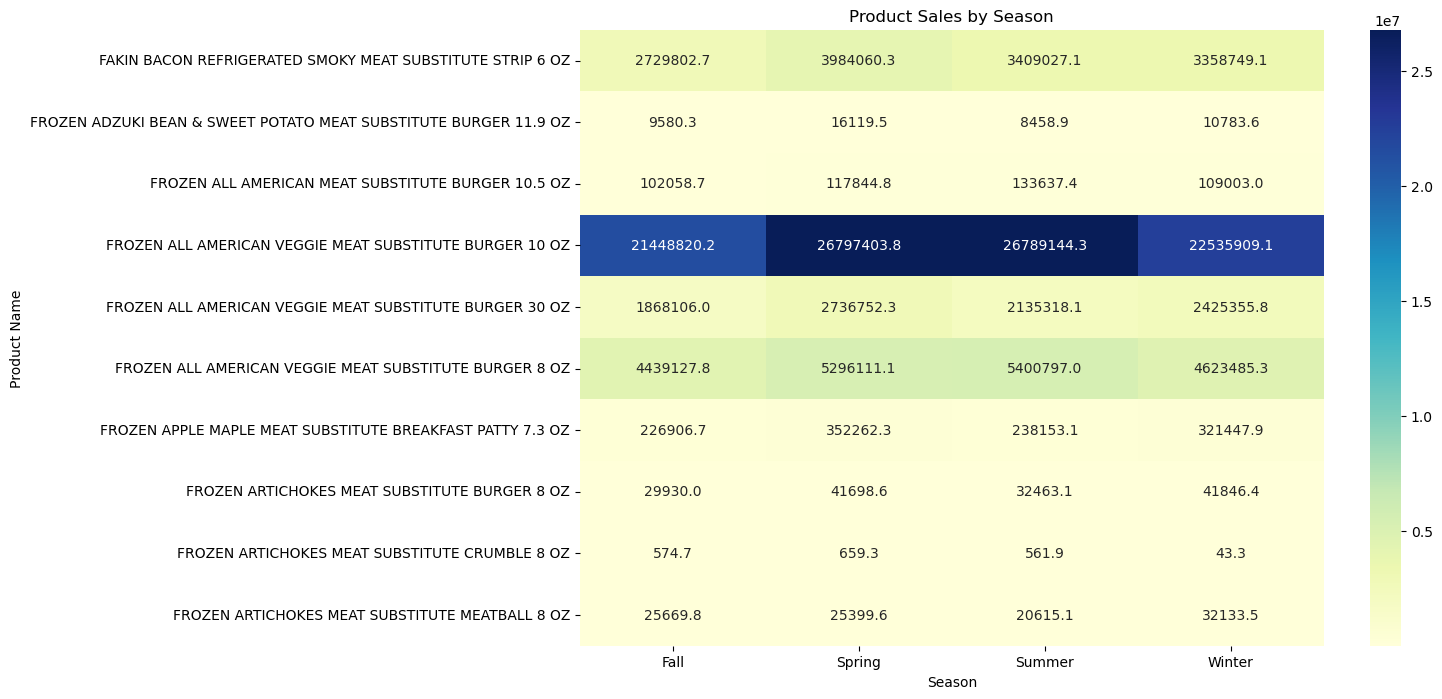

In [14]:
# Seasonality: Since the data includes a 'Season' column, you can examine seasonal trends in sales to determine if certain products sell better in certain seasons.
# Step 1: Aggregate Sales by Season
seasonal_sales = full_fz_rfg_sub.groupby('Season')['Dollar Sales'].sum().reset_index()

# Step 2: Visualize Sales Trends by Season
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_sales, x='Season', y='Dollar Sales')
plt.title('Total Dollar Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Dollar Sales')
plt.show()

# Step 3: Compare Product Performance by Season
product_seasonal_sales = full_fz_rfg_sub.groupby(['Season', 'Product Name'])['Dollar Sales'].sum().reset_index()

# Creating a pivot table for better visualization
pivot_table = product_seasonal_sales.pivot(index='Product Name', columns='Season', values='Dollar Sales').head(10)

# Visualizing with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Product Sales by Season')
plt.xlabel('Season')
plt.ylabel('Product Name')
plt.show()

For all meat alternative products, sales difference in seasonality is not big, however, sales in Spring still higher than the rest season

## Analysis: Sales by Location

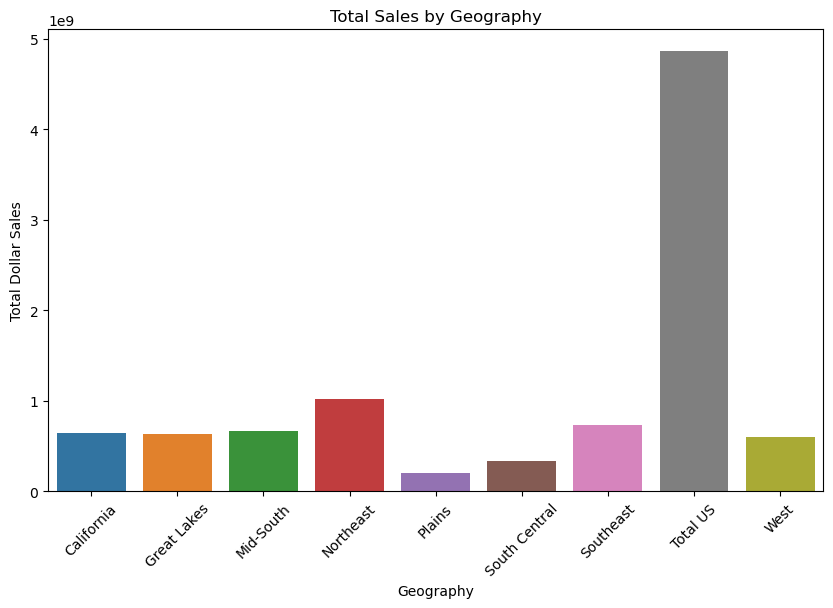

In [15]:
# Geographical Analysis: The 'Geography' column can be used to determine regional preferences or sales performance.
geo_sales_summary = full_fz_rfg_sub.groupby('Geography')['Dollar Sales'].agg(['sum', 'mean', 'count'])

# Step 2: Visualize Sales by Region
plt.figure(figsize=(10, 6))
sns.barplot(x=geo_sales_summary.index, y=geo_sales_summary['sum'])
plt.title('Total Sales by Geography')
plt.xlabel('Geography')
plt.ylabel('Total Dollar Sales')
plt.xticks(rotation=45)
plt.show()

Pattern:
1. Except mid region of U.S. such as Plains and South Central, all other regions have higher sales of meat alternative, especially in Northeast and Southeast.
2. This Probably because in mid region, people prefer to eat meat
3. It might be associated with slaughter industry

## Analysis: Seasonality

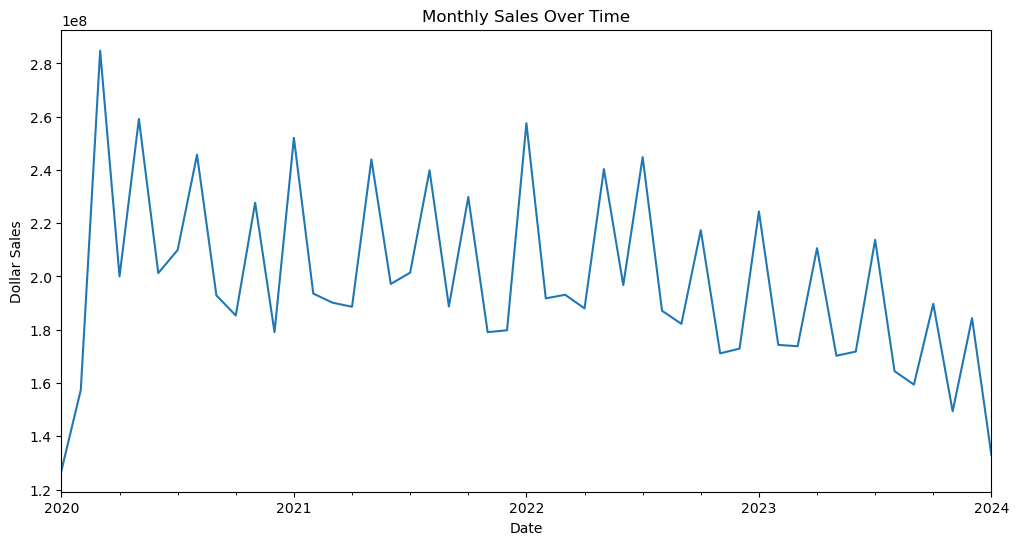

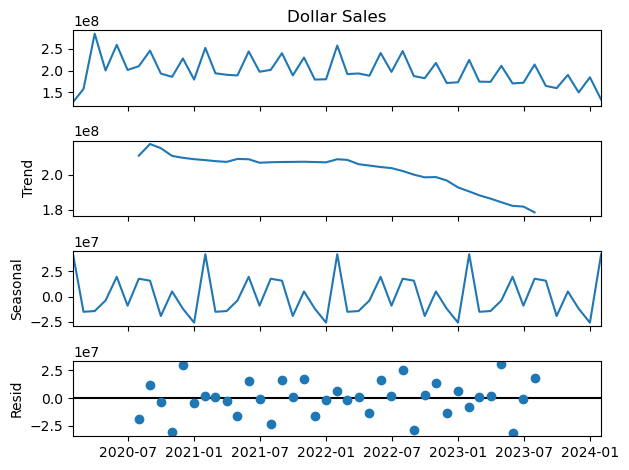

In [16]:
# Time Series Analysis: Use the 'Year', 'Quarter', and 'Month' columns to perform a time series analysis to see sales trends over time.

from statsmodels.tsa.seasonal import seasonal_decompose

# Time Series Analysis: Use the 'Year', 'Quarter', and 'Month' columns to perform a time series analysis to see sales trends over time.
full_fz_rfg_sub['Date'] = pd.to_datetime(full_fz_rfg_sub['Year'].astype(str) + '-' + (full_fz_rfg_sub['Month']).astype(str))

# Step 2: Aggregate Sales Over Time
# Set the date as the index and sort it
full_fz_rfg_sub.set_index('Date', inplace=True)
full_fz_rfg_sub.sort_index(inplace=True)

# Resample the data monthly and sum up the sales
monthly_sales = full_fz_rfg_sub['Dollar Sales'].resample('M').sum()

# Step 3: Visualize Sales Trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Dollar Sales')
plt.show()

# Step 4: Decompose the Time Series
result = seasonal_decompose(monthly_sales, model='additive')
result.plot()
plt.show()

Pattern
1. Data in 2024 is not sufficient
2. In each year, sales reach to high point and gradually decrease by the time until the end of the year
3. It might because 
    1. Spring produce more vegetables
    2. Hot weather in Summer make people have less appetize
    3. People tend to eat foods with high-energy, high-calories
4. The overall trend of meat alternative sales is in decrease

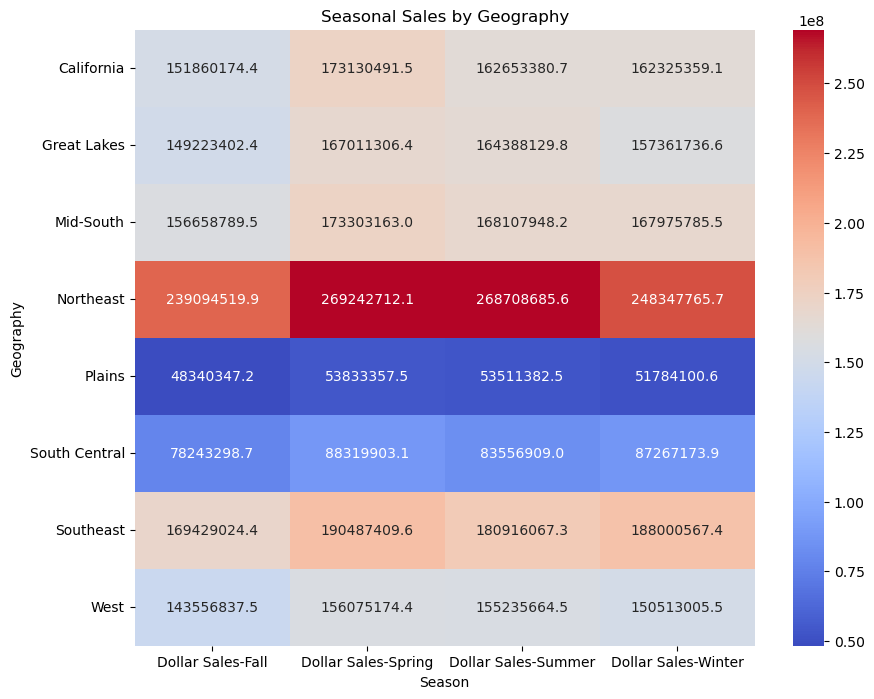

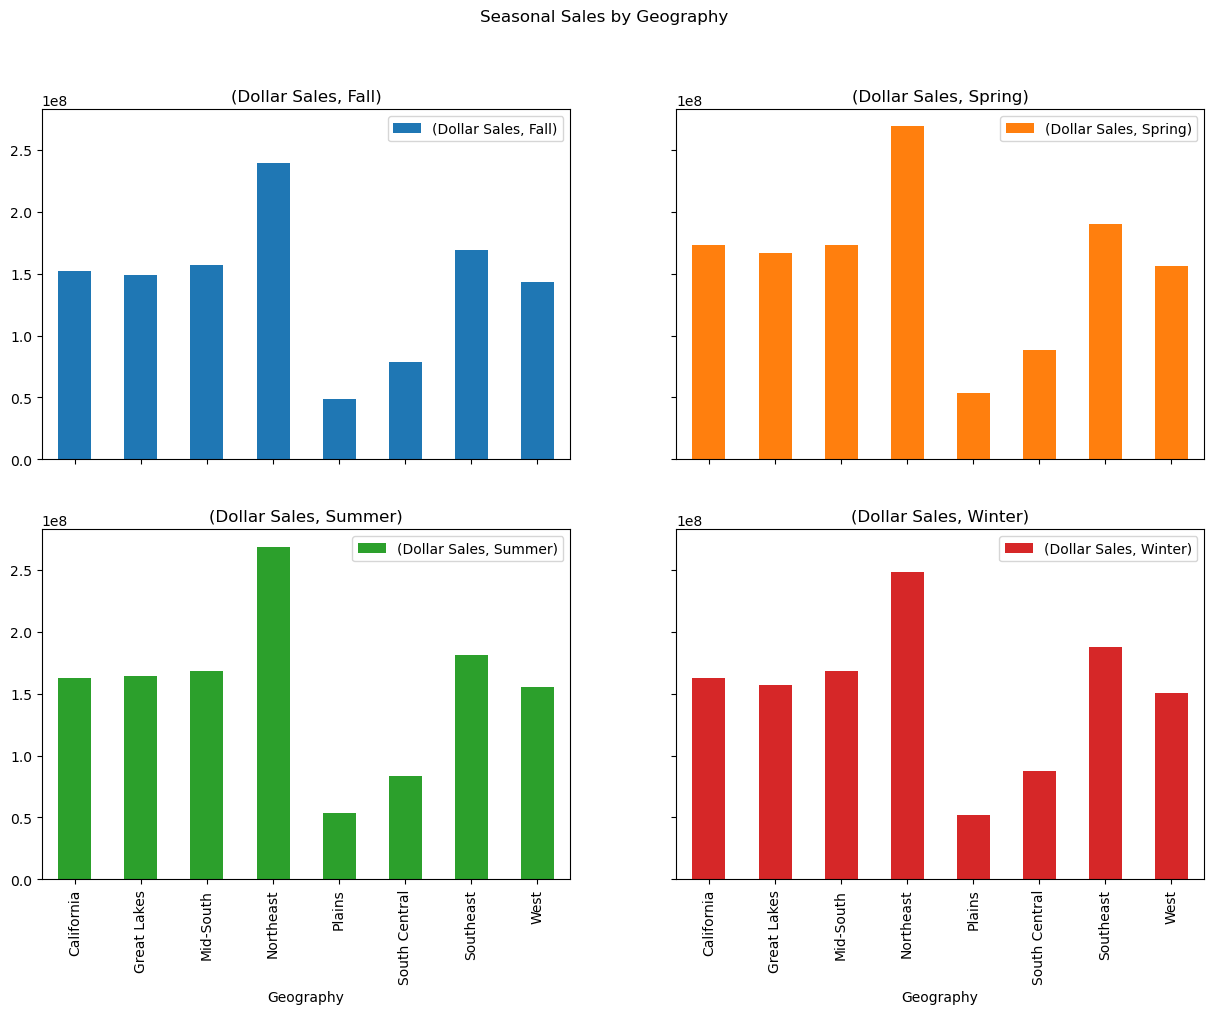

In [18]:
# Filter data
filtered_df = full_fz_rfg_sub[full_fz_rfg_sub['Geography'] != 'Total US']
# Step 1: Create a Pivot Table
pivot_table = filtered_df.pivot_table(
    values='Dollar Sales', 
    index=['Geography', 'Season'], 
    aggfunc='sum'
).sort_index()

# Step 2: Visualize Data
# For a simple heatmap:
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table.unstack(level='Season'), cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Seasonal Sales by Geography')
plt.xlabel('Season')
plt.ylabel('Geography')
plt.show()

# For bar charts, if you want to compare seasons across geographies:
pivot_table.unstack().plot(kind='bar', subplots=True, layout=(2,2), figsize=(15, 10), sharey=True)
plt.suptitle('Seasonal Sales by Geography')
plt.show()

# Step 3: Statistical Analysis
# Depending on your requirements, you might perform an ANOVA test, time series decomposition, etc.



## Product & Flavor & Value | Unit Analysis

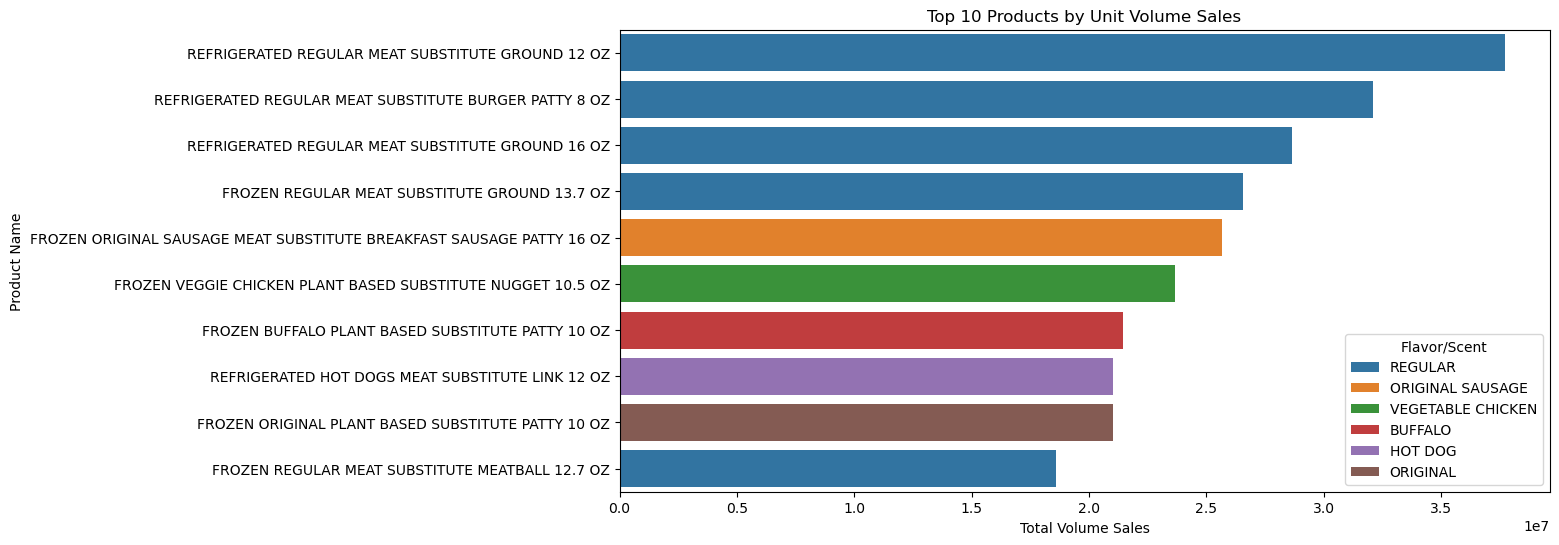

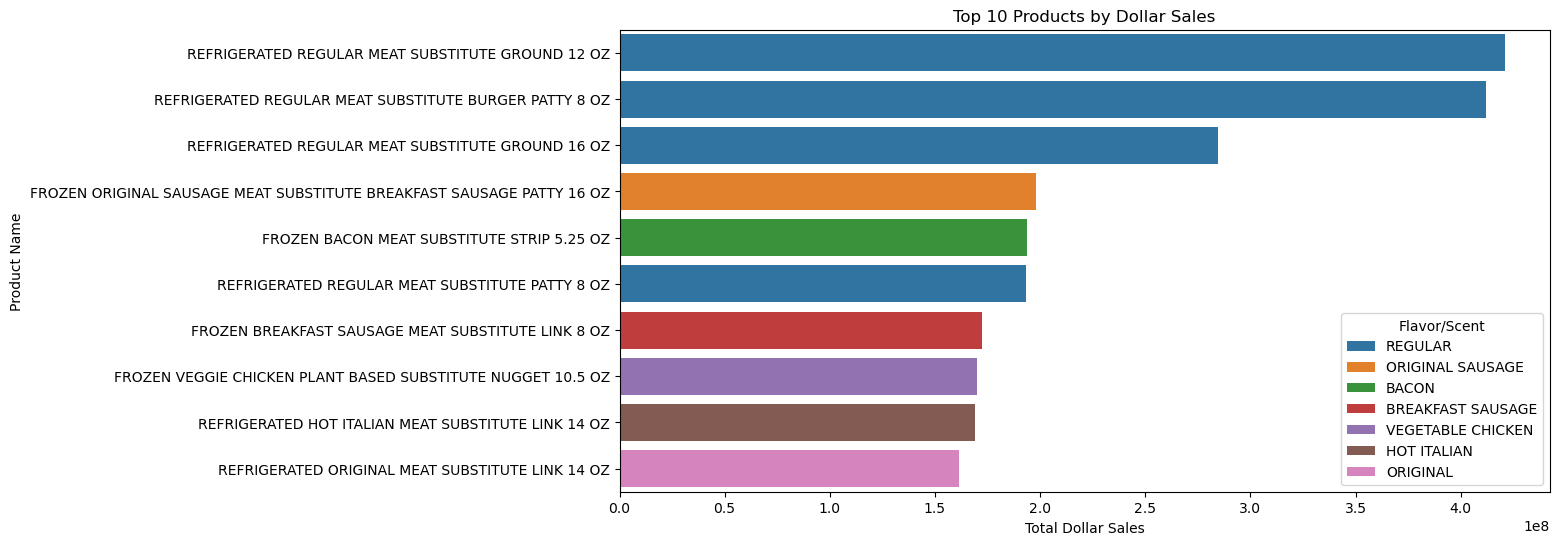

In [19]:
# Product Mix Analysis: Evaluate which products (Product Name, Flavor/Scent) are the strongest performers in terms of unit volume and dollar sales.
# Step 1: Aggregate Data by Product and Flavor
product_performance = full_fz_rfg_sub.groupby(['Product Name', 'Flavor / Scent']).agg({
    'Base Volume Sales': 'sum',
    'Dollar Sales': 'sum'
}).reset_index()

# Step 2: Rank Products by Sales Volume and Revenue
product_performance.sort_values(by='Base Volume Sales', ascending=False, inplace=True)

# Step 3: Visualize Product Performance
# Visualize the top 10 products by unit volume
plt.figure(figsize=(12, 6))
top_volume_products = product_performance.nlargest(10, 'Base Volume Sales')
sns.barplot(data=top_volume_products, x='Base Volume Sales', y='Product Name', hue='Flavor / Scent', dodge = False)
plt.title('Top 10 Products by Unit Volume Sales')
plt.xlabel('Total Volume Sales')
plt.ylabel('Product Name')
plt.legend(title='Flavor/Scent')
plt.show()

# Visualize the top 10 products by dollar sales
plt.figure(figsize=(12, 6))
top_sales_products = product_performance.nlargest(10, 'Dollar Sales')
sns.barplot(data=top_sales_products, x='Dollar Sales', y='Product Name', hue='Flavor / Scent', dodge=False)
plt.title('Top 10 Products by Dollar Sales')
plt.xlabel('Total Dollar Sales')
plt.ylabel('Product Name')
plt.legend(title='Flavor/Scent')
plt.show()

Similar, especially for the top 3 product. Dollar Sales & Volume Sales share the same ranking. 

# Report 2 Content

## Analysis: Product attributes between Morningstar & Gardein & Impossible

In [3]:
full_fz_rfg_sub.columns

Index(['Geography', 'Year', 'Quarter', 'Month', 'Season', 'Form',
       'Manufacturer Name', 'Brand Name', 'Product Name', 'Flavor / Scent',
       'Meat Source', 'Unit Sales', 'Volume Sales', 'Dollar Sales',
       'Price per Unit', 'Price per Volume', 'Base Unit Sales',
       'Base Volume Sales', 'Base Dollar Sales', 'Incremental Units',
       'Incremental Volume', 'Incremental Dollars',
       'ACV Weighted Distribution'],
      dtype='object')

In [4]:
# This will only increase top 3 companies that make plant-based meals, and focus on chicken products
filtered_df = full_fz_rfg_sub[(full_fz_rfg_sub['Brand Name'].str.contains('GARDEIN')) 
                              | (full_fz_rfg_sub['Brand Name'].str.contains('MORNINGSTAR'))
                             | (full_fz_rfg_sub['Brand Name'].str.contains('IMPOSSIBLE'))]

In [5]:
temp = filtered_df[(filtered_df['Manufacturer Name'] == 'CONAGRA BRANDS') & (filtered_df['Flavor / Scent'] == 'REGULAR')]
temp['Product Name'].drop_duplicates()

42             FROZEN REGULAR FISH SUBSTITUTE FILET 10.1 OZ
44              FROZEN REGULAR MEAT SUBSTITUTE BURGER 12 OZ
45        FROZEN REGULAR MEAT SUBSTITUTE BURGER PATTY 24 OZ
46        FROZEN REGULAR MEAT SUBSTITUTE BURGER PATTY 48 OZ
47            FROZEN REGULAR MEAT SUBSTITUTE GROUND 13.7 OZ
49          FROZEN REGULAR MEAT SUBSTITUTE MEATBALL 12.7 OZ
50          FROZEN REGULAR MEAT SUBSTITUTE MEATBALL 33.8 OZ
51               FROZEN REGULAR MEAT SUBSTITUTE SLICED 9 OZ
52              FROZEN REGULAR MEAT SUBSTITUTE SLIDER 10 OZ
53            FROZEN REGULAR SEAFOOD SUBSTITUTE CAKE 8.8 OZ
366        FROZEN REGULAR POULTRY SUBSTITUTE BREAST 31.5 OZ
367         FROZEN REGULAR POULTRY SUBSTITUTE NUGGET 8.6 OZ
368         FROZEN REGULAR POULTRY SUBSTITUTE PATTY 12.4 OZ
369           FROZEN REGULAR POULTRY SUBSTITUTE WING 8.4 OZ
6135             FROZEN REGULAR MEAT SUBSTITUTE BURGER 8 OZ
6816      FROZEN REGULAR MEAT SUBSTITUTE BREAKFAST PATTY...
8913          FROZEN REGULAR MEAT SUBSTI

In [6]:
filtered_df.head(5)

,Geography,Year,Quarter,Month,Season,Form,Manufacturer Name,Brand Name,Product Name,Flavor / Scent,...,Dollar Sales,Price per Unit,Price per Volume,Base Unit Sales,Base Volume Sales,Base Dollar Sales,Incremental Units,Incremental Volume,Incremental Dollars,ACV Weighted Distribution
32,Total US,2020,1,1,Winter,TIP,CONAGRA BRANDS,GARDEIN,FROZEN BEEF MEAT SUBSTITUTE TIP 9 OZ,BEEF,...,104457.642635,3.500672,6.223417,19728.198361,11097.111579,83502.999603,10111.113376,5687.501274,20954.643032,32.604784
33,Total US,2020,1,1,Winter,BURGER,CONAGRA BRANDS,GARDEIN,FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BUR...,CHIPOTLE BLACK BEAN,...,97010.214893,3.684628,4.912838,16897.612160,12673.209112,72219.977427,9430.745251,7073.058946,24790.237466,28.095010
34,Total US,2020,1,1,Winter,BURGER,CONAGRA BRANDS,GARDEIN,FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BUR...,CHIPOTLE BLACK BEAN,...,435.620000,11.773514,3.924505,37.000000,111.000000,435.620000,0.000000,0.000000,0.000000,0.009000
35,Total US,2020,1,1,Winter,BURGER,CONAGRA BRANDS,GARDEIN,FROZEN CHIPOTLE BLACK BEAN MEAT SUBSTITUTE BUR...,CHIPOTLE BLACK BEAN,...,63462.960000,14.489260,4.563547,3464.639994,11000.231997,51556.784374,915.360006,2906.268003,11906.175626,3.709527
36,Total US,2020,1,1,Winter,MEATBALL,CONAGRA BRANDS,GARDEIN,FROZEN CLASSIC MEAT SUBSTITUTE MEATBALL 12.7 OZ,CLASSIC,...,6.480000,3.240000,4.081633,2.000000,1.587600,6.480000,0.000000,0.000000,0.000000,0.002775


### Product Ratio

In [7]:
# Process to calculate distinct products
table_1 = filtered_df.drop_duplicates('Product Name').groupby(['Manufacturer Name', 'Flavor / Scent']).agg({'Product Name':'count'}).reset_index()
table_1

,Manufacturer Name,Flavor / Scent,Product Name
0,CONAGRA BRANDS,7 GRAIN,3
1,CONAGRA BRANDS,BARBEQUE,1
2,CONAGRA BRANDS,BEEF,1
3,CONAGRA BRANDS,BREAKFAST SAUSAGE,1
4,CONAGRA BRANDS,CHICKEN,6
...,...,...,...
82,KELLANOVA,VEGETABLE LOVERS,1
83,KELLANOVA,VEGETABLE MEAT LOVER,1
84,KELLANOVA,VEGETABLE PORK,1
85,KELLANOVA,WHITE BEAN CHILI,1


In [8]:
# Product counts
new_table_1 = table_1.groupby('Manufacturer Name').agg({'Product Name':'sum'}).rename(columns={'Product Name':'Product Counts'}).reset_index()
new_table_1

,Manufacturer Name,Product Counts
0,CONAGRA BRANDS,65
1,IMPOSSIBLE FOODS INC,22
2,KELLANOVA,96


In [9]:
# Transaction counts
table_2 = filtered_df.groupby(['Manufacturer Name']).agg({'Product Name':'count'}).rename(columns={'Product Name':'Transaction Records'}).reset_index()
table_2

,Manufacturer Name,Transaction Records
0,CONAGRA BRANDS,74447
1,IMPOSSIBLE FOODS INC,21527
2,KELLANOVA,99653


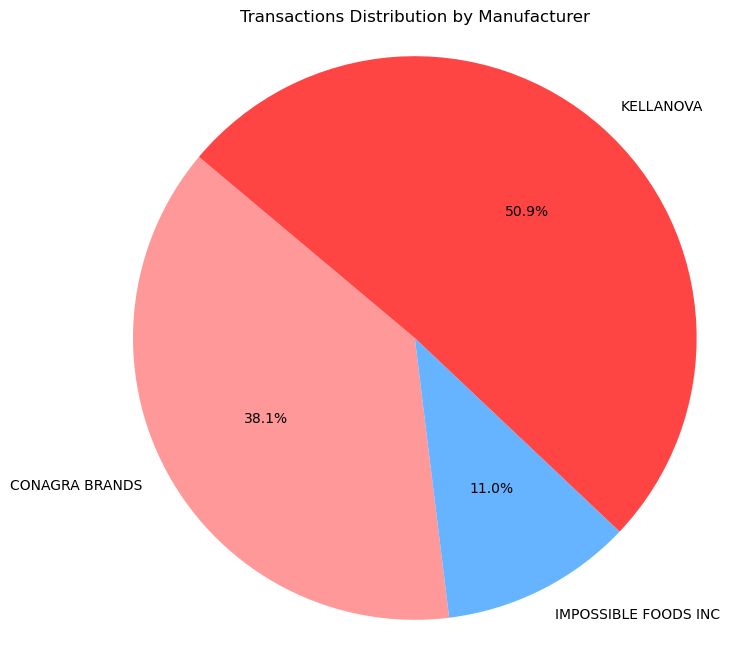

In [10]:
counts = table_2['Transaction Records'].sum()  # Summing the given values for each manufacturer

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(table_2['Transaction Records'], labels=table_2['Manufacturer Name'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#ff4444' ])
plt.title('Transactions Distribution by Manufacturer')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()


<strong>Kellanova is the manufacturer name for all its morningstar series products, while Conagra brans is the manufactuer name for all Gardein products.
By this table, we can tell that there are extremly huge difference between amount of product. Kellanova > Conagra > Impossible. The advantage of wide varity in products leads to more buyer records. Kellanova > Conagra > Impossible<strong>

### Grouping by Flavor, Ranking by Product & Sales

In [11]:
table_3 = filtered_df.drop_duplicates('Product Name').groupby(['Manufacturer Name', 'Flavor / Scent']).agg({'Product Name':'count'})
table_3['total sales'] = filtered_df.groupby(['Manufacturer Name', 'Flavor / Scent']).agg({'Dollar Sales':'sum'})
table_3['product_rank'] = table_3['Product Name'].rank(ascending = False, method = 'first')
table_3['sales_rank'] = table_3['total sales'].rank(ascending = False, method = 'first')
table_3 = table_3.reset_index()
#table_3

In [12]:
# Flavor checking
table_3.groupby(['Manufacturer Name']).agg({'Flavor / Scent': 'count'})

,Flavor / Scent
Manufacturer Name,
CONAGRA BRANDS,30
IMPOSSIBLE FOODS INC,9
KELLANOVA,48


In [13]:
table_3[table_3['Manufacturer Name'] == 'CONAGRA BRANDS'].sort_values('sales_rank')

,Manufacturer Name,Flavor / Scent,Product Name,total sales,product_rank,sales_rank
18,CONAGRA BRANDS,REGULAR,22,5.365776e+08,1.0,2.0
4,CONAGRA BRANDS,CHICKEN,6,1.855102e+08,4.0,9.0
0,CONAGRA BRANDS,7 GRAIN,3,1.309555e+08,10.0,13.0
14,CONAGRA BRANDS,MANDARIN ORANGE,1,8.785034e+07,42.0,18.0
26,CONAGRA BRANDS,TERIYAKI,2,4.336291e+07,22.0,25.0
27,CONAGRA BRANDS,TURKEY,1,2.815810e+07,51.0,27.0
17,CONAGRA BRANDS,ORIGINAL,2,2.541995e+07,20.0,28.0
2,CONAGRA BRANDS,BEEF,1,2.499456e+07,34.0,30.0
6,CONAGRA BRANDS,CHIPOTLE BLACK BEAN,3,2.433308e+07,11.0,31.0
16,CONAGRA BRANDS,NASHVILLE HOT,1,1.881774e+07,44.0,34.0


In [14]:
table_3[table_3['Manufacturer Name'] == 'KELLANOVA'].sort_values('sales_rank')

,Manufacturer Name,Flavor / Scent,Product Name,total sales,product_rank,sales_rank
61,KELLANOVA,ORIGINAL,8,3.551381e+08,3.0,3.0
64,KELLANOVA,REGULAR,17,2.852135e+08,2.0,4.0
71,KELLANOVA,SPICY BLACK BEAN,2,2.315512e+08,31.0,5.0
80,KELLANOVA,VEGETABLE GRILLER ORIGINAL,2,2.002743e+08,32.0,6.0
62,KELLANOVA,ORIGINAL SAUSAGE,1,1.978553e+08,68.0,7.0
39,KELLANOVA,BACON,2,1.950485e+08,24.0,8.0
42,KELLANOVA,BUFFALO,4,1.761298e+08,8.0,10.0
41,KELLANOVA,BREAKFAST SAUSAGE,3,1.747002e+08,13.0,11.0
79,KELLANOVA,VEGETABLE CHICKEN,3,1.698782e+08,17.0,12.0
51,KELLANOVA,GARDEN VEGETABLE,4,1.072739e+08,9.0,15.0


In [15]:
table_3[table_3['Manufacturer Name'] == 'IMPOSSIBLE FOODS INC'].sort_values('sales_rank')

,Manufacturer Name,Flavor / Scent,Product Name,total sales,product_rank,sales_rank
35,IMPOSSIBLE FOODS INC,REGULAR,5,7.214120e+08,5.0,1.0
31,IMPOSSIBLE FOODS INC,CHICKEN,4,1.175260e+08,6.0,14.0
36,IMPOSSIBLE FOODS INC,SAVORY,3,5.149151e+07,12.0,21.0
32,IMPOSSIBLE FOODS INC,HOMESTYLE,1,4.505414e+07,55.0,24.0
37,IMPOSSIBLE FOODS INC,SPICY,4,3.514959e+07,7.0,26.0
30,IMPOSSIBLE FOODS INC,BRATWURST,1,2.369121e+07,54.0,32.0
38,IMPOSSIBLE FOODS INC,SPICY SAUSAGE,2,2.337895e+07,23.0,33.0
34,IMPOSSIBLE FOODS INC,ITALIAN SAUSAGE,1,1.333919e+07,57.0,42.0
33,IMPOSSIBLE FOODS INC,ITALIAN,1,5.965307e+06,56.0,49.0


All three companies make profit most from regular / original / chicken products. However, with over 60+ products and 30 flavors from Conagra, it still cannot beat IMPOSSIBLE on marketing.

Which is because
1. Only 4 products from Conagra are in top 20. 
2. IMPOSSIBLE are making more profit from their 22 products of 9 flavors, which indicates that IMPOSSIBLE beats Conagra from
    1. Products Quality (Flavor, Size)
    2. IMPOSSBLE might have a better marketing strategy such as advertisement deployment than conagra

Reason for Conagra cannot beat Kellanova might be:
1. 18 products from Kellanova are in the top 20 from the list of sales
2. kellanova has more flavors(48) & products(96) than conagra (30, 65)

According to table1 to table 3, suggestions could be:
1. Develop more flavor
2. Provide more options for single product, especially for regular flavor

Reasons might for regular flavor products has most sales might be:
1. people like to season it later based on their preference
2. flavor adjusted by manufacturer is just terrible

### What products should Conagra publish in the future?

In [16]:
# Set 2022 as boundary, New products that Conagra doesn't have after 2022
recent_time_filtered_df = filtered_df[filtered_df['Year'] >= 2022]
past_time_filtered_df = filtered_df[filtered_df['Year'] < 2022]['Product Name']
time_product_filtered_df = recent_time_filtered_df[~recent_time_filtered_df['Product Name'].isin(past_time_filtered_df)]
time_product_filtered_df = time_product_filtered_df[['Year', 'Manufacturer Name', 'Product Name','Flavor / Scent', 'Dollar Sales']]
time_product_filtered_df = time_product_filtered_df.drop_duplicates('Product Name').sort_values('Dollar Sales', ascending = False) #table 4
temp = time_product_filtered_df[time_product_filtered_df['Manufacturer Name'] != 'CONAGRA BRANDS'].sort_values('Manufacturer Name')
temp

,Year,Manufacturer Name,Product Name,Flavor / Scent,Dollar Sales
477464,2022,IMPOSSIBLE FOODS INC,REFRIGERATED BRATWURST MEAT SUBSTITUTE LINK 13...,BRATWURST,6505.086792
755267,2023,IMPOSSIBLE FOODS INC,REFRIGERATED REGULAR MEAT SUBSTITUTE PATTY 10....,REGULAR,4878.220310
771879,2023,IMPOSSIBLE FOODS INC,FROZEN CHICKEN PLANT BASED CHICKEN SUBSTITUTE ...,CHICKEN,3930.210000
477465,2022,IMPOSSIBLE FOODS INC,REFRIGERATED ITALIAN SAUSAGE MEAT SUBSTITUTE L...,ITALIAN SAUSAGE,1597.017826
500943,2022,IMPOSSIBLE FOODS INC,FROZEN ITALIAN MEAT SUBSTITUTE MEATBALL 14 OZ,ITALIAN,996.704778
495335,2022,IMPOSSIBLE FOODS INC,FROZEN REGULAR POULTRY SUBSTITUTE PATTY 13.5 OZ,REGULAR,767.314482
740759,2023,IMPOSSIBLE FOODS INC,FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE NU...,SPICY,481.104507
740760,2023,IMPOSSIBLE FOODS INC,FROZEN SPICY PLANT BASED CHICKEN SUBSTITUTE PA...,SPICY,472.056896
474421,2022,IMPOSSIBLE FOODS INC,FROZEN SAVORY MEAT SUBSTITUTE PATTY 12.8 OZ,SAVORY,324.685212
476620,2022,IMPOSSIBLE FOODS INC,REFRIGERATED SPICY SAUSAGE MEAT SUBSTITUTE LIN...,SPICY SAUSAGE,5.533452


### Baby Step to Impossible

In [25]:
temp = time_product_filtered_df[time_product_filtered_df['Manufacturer Name'] == 'KELLANOVA'].sort_values('Manufacturer Name')
#temp = time_product_filtered_df[time_product_filtered_df['Manufacturer Name'] == 'IMPOSSIBLE FOODS INC'].sort_values('Manufacturer Name')
temp

,Year,Manufacturer Name,Product Name,Flavor / Scent,Dollar Sales
737859,2023,KELLANOVA,FROZEN ORIGINAL MEAT SUBSTITUTE SAUSAGE PATTY ...,ORIGINAL,20533.720000
743250,2023,KELLANOVA,FROZEN ORIGINAL PLANT BASED CHICKEN SUBSTITUTE...,ORIGINAL,216.620884
499289,2022,KELLANOVA,FROZEN HOT AND SPICY MEAT SUBSTITUTE FILET 12 OZ,HOT & SPICY,178.505861
765317,2023,KELLANOVA,FROZEN CHEDDAR MEAT SUBSTITUTE FRIES 13.5 OZ,CHEDDAR,42.392854
478710,2022,KELLANOVA,FROZEN REGULAR MEAT SUBSTITUTE GROUND 16 OZ,REGULAR,22.293498
765336,2023,KELLANOVA,FROZEN STEAKHOUSE STYLE MEAT SUBSTITUTE BURGER...,STEAKHOUSE STYLE,17.383378
735571,2023,KELLANOVA,FROZEN CHICKEN PLANT BASED SUBSTITUTE NUGGET 8 OZ,CHICKEN,4.490000


### Trend Plot

/var/folders/cr/w41p_r656b17sf3g2fyh6wnm0000gn/T/ipykernel_59990/1607717791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_2024_df['Period'] = no_2024_df['Year'].astype(str) + ' Q' + filtered_df['Quarter'].astype(str)
/var/folders/cr/w41p_r656b17sf3g2fyh6wnm0000gn/T/ipykernel_59990/1607717791.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  product_filtered_df = no_2024_df[filtered_df['Product Name'].isin(products_of_interest)]


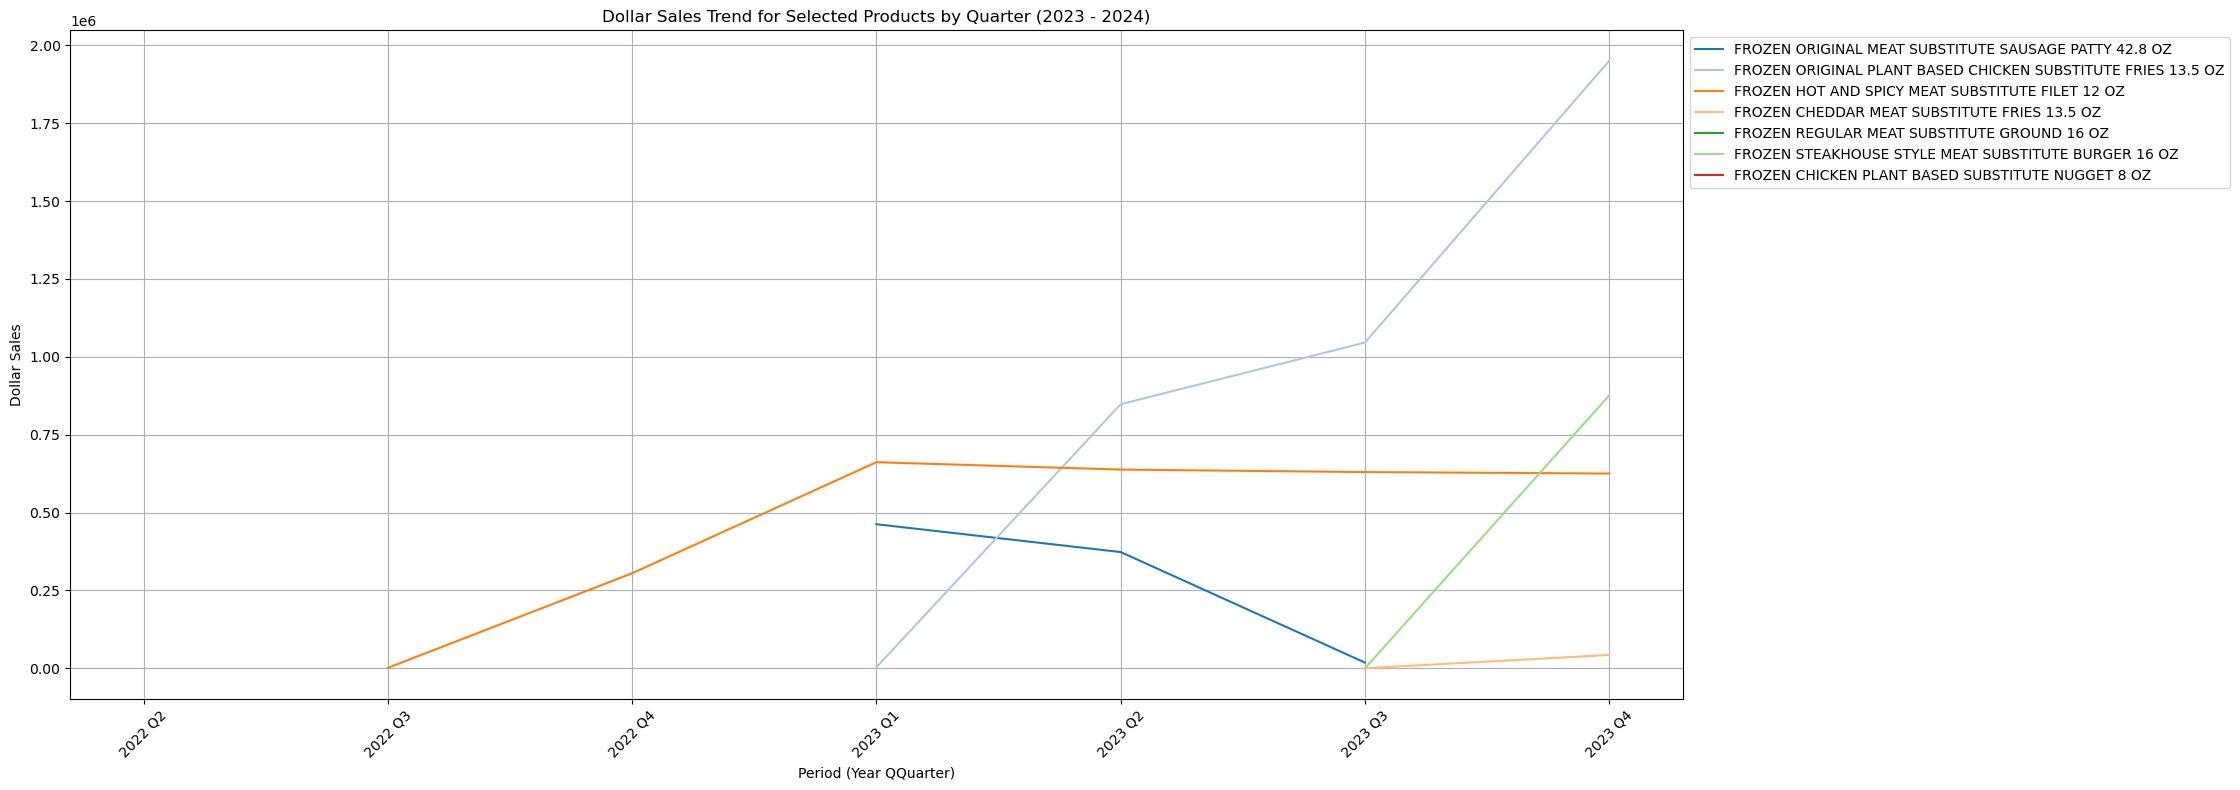

In [26]:
no_2024_df = filtered_df[filtered_df['Year'] != 2024]
no_2024_df['Period'] = no_2024_df['Year'].astype(str) + ' Q' + filtered_df['Quarter'].astype(str)

products_of_interest = temp['Product Name']

product_filtered_df = no_2024_df[filtered_df['Product Name'].isin(products_of_interest)]

# Aggregate 'Dollar Sales' by 'Year' and 'Product Name'
aggregated_df = product_filtered_df.groupby(['Period', 'Product Name']).agg({'Dollar Sales': 'sum'}).reset_index()

# Pivot the DataFrame to have 'Product Name' as columns, 'Year' as the index, and 'Dollar Sales' as values
pivoted_df = aggregated_df.pivot(index='Period', columns='Product Name', values='Dollar Sales')
pivoted_df



# Create a color palette with a unique color for each product
color_palette = plt.cm.tab20(np.linspace(0, 1, 20))
plt.figure(figsize=(30, 8))
for i, product in enumerate(products_of_interest):
    plt.plot(pivoted_df.index, pivoted_df[product], label=product, color=color_palette[i])

plt.title('Dollar Sales Trend for Selected Products by Quarter (2023 - 2024)')
plt.xlabel('Period (Year QQuarter)')
plt.ylabel('Dollar Sales')
plt.xticks(rotation=45)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()



Things than can conlude from table 4 & visualization above:
1. 21 new plant-based products were published since 2022. (Doesn't include new products from Conagra)
2. IMPOSSIBLE Products:

    Top 3 products (from IMPOSSIBLE) that sales most are:
    
        1. FROZEN REGULAR POULTRY SUBSTITUTE PATTY 14 OZ
        2. FROZEN CHECK PLANT BASED CHICKEN SUBSTITUTE NUGGEST 32 OZ
        3. REFRIGERATED BRATWURST MEAT SUBSTITUTE LINK 13.5 OZ  
        
    Especially for FROZEN REGULAR POULTRY SUBSTITUTE PATTY, by the time it's released, its sales performance goes like a rocket<p></p>
    For FROZEN ORIGINAL PLANT BASED CHICKEN SUBSTITUTE FRIES & FROZEN STEAKHOUSE STYLE MEAT SUBSTITUTE BURGER, though it's released since 2023 Q1 and 2023 Q3, the plot shows more people would like to buy them as its sales present a 45 degree upword trend
    
3. KELLANOVA Products:
    Considerable Products: FROZEN PRIGINAL MEAT SUBSTITUTE SAUSAGE PATTY 42.8 OZ
    The rest of it, from my opinions, do not deserve.
    
4. Conagra should give products with sales below 2.0 and don't present a upword trend a try

Conclusion: <p>
It's not hard to tell that each single new product that sells best at least has the following attribtues:
1. Chicken flavor based
2. Simple seasoning or no seasoning (regular flavor)
3. Substitution for fast food or foods that generally have high calories such as fries, patty
4. This doesn't indicate Conagra should complete copy what competitors do, instead, it should learn from them and develop a "Conagra-made" product
</p>

### Package Size Impact

In [27]:
model_dataset = filtered_df[['Geography', 'Year', 'Quarter', 'Month', 'Season', 'Form', 'Manufacturer Name', 'Flavor / Scent', 'Product Name', 'Unit Sales', 'Volume Sales', 'Dollar Sales', 'Price per Unit']].reset_index()
model_dataset = model_dataset[['Geography', 'Year', 'Quarter', 'Month', 'Season', 'Form', 'Manufacturer Name', 'Flavor / Scent', 'Product Name', 'Unit Sales', 'Volume Sales', 'Dollar Sales', 'Price per Unit']]
model_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195627 entries, 0 to 195626
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Geography          195627 non-null  object 
 1   Year               195627 non-null  int64  
 2   Quarter            195627 non-null  int64  
 3   Month              195627 non-null  int64  
 4   Season             195627 non-null  object 
 5   Form               195627 non-null  object 
 6   Manufacturer Name  195627 non-null  object 
 7   Flavor / Scent     195627 non-null  object 
 8   Product Name       195627 non-null  object 
 9   Unit Sales         195627 non-null  float64
 10  Volume Sales       195627 non-null  float64
 11  Dollar Sales       195627 non-null  float64
 12  Price per Unit     195627 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 19.4+ MB


In [28]:
def extract_size(row):
    return row.split(' ')[-2]

def map_size_into_text(row):
    if row <= 12:
        return 'Small'
    elif row >= 18:
        return 'Large'
    else:
        return 'Medium'

In [29]:
model_dataset['Package Size'] = model_dataset['Product Name'].apply(extract_size)
model_dataset['Package Size'] = model_dataset['Package Size'].astype(float)

In [30]:
model_dataset = model_dataset[['Geography', 'Year', 'Quarter', 'Month', 'Season', 'Manufacturer Name', 'Form', 'Flavor / Scent', 'Package Size', 'Unit Sales', 'Volume Sales', 'Dollar Sales', 'Price per Unit']]
model_dataset = model_dataset.rename(columns={"Dollar Sales": "Dollar_Sales", "Flavor / Scent": "Flavor"})
model_dataset['Portion'] = model_dataset['Package Size'].apply(map_size_into_text)
model_dataset

,Geography,Year,Quarter,Month,Season,Manufacturer Name,Form,Flavor,Package Size,Unit Sales,Volume Sales,Dollar_Sales,Price per Unit,Portion
0,Total US,2020,1,1,Winter,CONAGRA BRANDS,TIP,BEEF,9.00,29839.311737,16784.612852,104457.642635,3.500672,Small
1,Total US,2020,1,1,Winter,CONAGRA BRANDS,BURGER,CHIPOTLE BLACK BEAN,12.00,26328.357411,19746.268058,97010.214893,3.684628,Small
2,Total US,2020,1,1,Winter,CONAGRA BRANDS,BURGER,CHIPOTLE BLACK BEAN,48.00,37.000000,111.000000,435.620000,11.773514,Large
3,Total US,2020,1,1,Winter,CONAGRA BRANDS,BURGER,CHIPOTLE BLACK BEAN,50.80,4380.000000,13906.500000,63462.960000,14.489260,Large
4,Total US,2020,1,1,Winter,CONAGRA BRANDS,MEATBALL,CLASSIC,12.70,2.000000,1.587600,6.480000,3.240000,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195622,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,PATTY,REGULAR,10.66,15.531694,10.348768,148.223625,9.543301,Small
195623,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,PATTY,REGULAR,8.00,8716.835892,4358.417946,46849.614533,5.374612,Small
195624,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,ROLL,SAVORY,14.00,2323.737534,2033.270342,11800.249721,5.078134,Medium
195625,West,2024,1,1,Winter,IMPOSSIBLE FOODS INC,ROLL,SPICY,14.00,3862.869813,3380.011087,19939.905740,5.161941,Medium


In [31]:
model_dataset['Package Size'].describe() # show column statistic data

count    195627.000000
mean         13.540915
std           8.284284
min           5.250000
25%           9.000000
50%          10.600000
75%          14.000000
max          56.000000
Name: Package Size, dtype: float64

In [32]:
model_dataset['Package Size'].unique() # show what values are in there

array([ 9.  , 12.  , 48.  , 50.8 , 12.7 , 40.  ,  8.  , 10.1 , 24.  ,
       13.7 , 33.8 , 10.  ,  8.8 , 10.6 , 10.5 , 15.75,  5.25, 16.  ,
       16.2 , 56.  ,  9.5 , 13.5 ,  8.4 , 32.  , 18.9 ,  9.4 , 18.  ,
       40.8 ,  8.1 , 31.5 ,  8.6 , 12.4 , 12.3 ,  9.75, 21.  , 20.  ,
        7.9 ,  8.5 , 11.  , 36.  , 10.3 , 14.1 , 15.  ,  6.5 , 14.7 ,
       14.  , 35.2 , 14.6 , 14.8 , 12.8 ,  7.4 , 42.8 , 16.64, 10.66,
       15.8 ])

Based on this information, Categorizing any package size that:
1. smaller than and equal to  12 as "Small"
2. greater than and equal to 20 as "Large"
3. smaller than 18 & greater than 12 as "Medium"

Logic behind this is using mean as threshold and +1 std to mean for large boundary

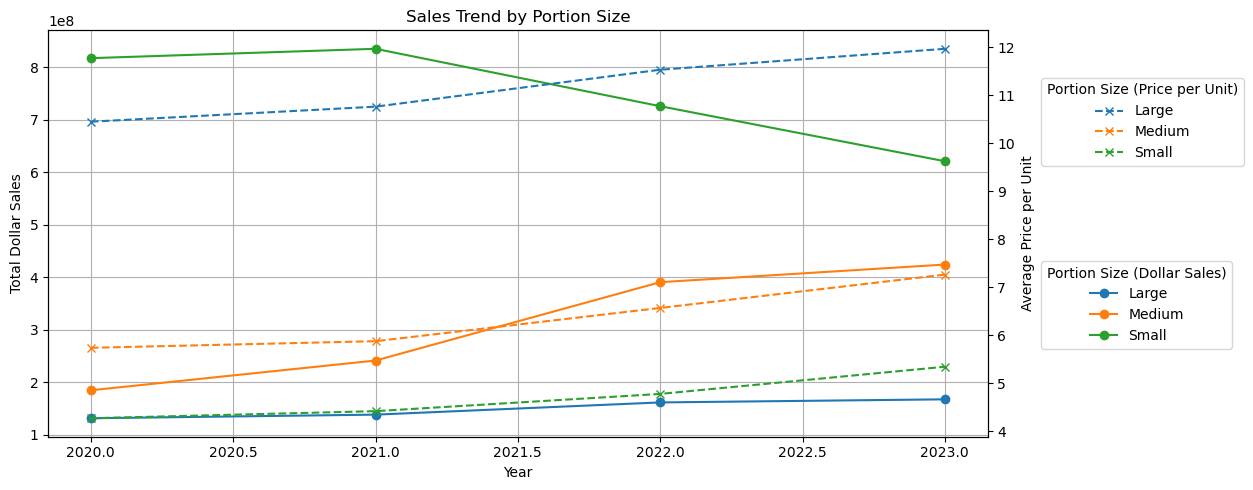

In [33]:
no_2024_df = model_dataset[model_dataset['Year'] != 2024]
# Group the data by 'Year' and 'Portion' and get the sum of 'Dollar_Sales' and 'Unit_Sales'
grouped_data = no_2024_df.groupby(['Year', 'Portion']).agg({
    'Dollar_Sales': 'sum',
    'Price per Unit': 'mean'
}).reset_index()

# Pivot the data to have years as the index and portion sizes as columns for each sales type
pivot_dollar_sales = grouped_data.pivot(index='Year', columns='Portion', values='Dollar_Sales')
pivot_unit_sales = grouped_data.pivot(index='Year', columns='Portion', values='Price per Unit')

# Create the first plot with 'Dollar_Sales'
fig, ax1 = plt.subplots(figsize=(15, 5))

line1 = pivot_dollar_sales.plot(kind='line', marker='o', ax=ax1)
ax1.set_title('Sales Trend by Portion Size')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Dollar Sales')
ax1.grid(True)

# Create a secondary y-axis for 'Unit_Sales'
ax2 = ax1.twinx()
line2 = pivot_unit_sales.plot(kind='line', marker='x', ax=ax2, linestyle='--')
ax2.set_ylabel('Average Price per Unit')

# Place the legend for 'Dollar_Sales' on the right side outside the plot
ax1.legend(title='Portion Size (Dollar Sales)', loc='upper left', bbox_to_anchor=(1.05, 0.45))

# Place the legend for 'Unit_Sales' below the first legend
ax2.legend(title='Portion Size (Price per Unit)', loc='upper left', bbox_to_anchor=(1.05, 0.90))

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Display the plot
plt.show()


Pattern(Sales):
1. Altough small size sales present downword trend, it's still selling most
2. Medium size has a obvious upword trend since 2021
3. Large size slightly increase by time, yet still it didn't sell that much

Pattern(Price per Unit):
1. just based on the plot, the price per unit difference between small & medium are approximately 3 dollars, while it's 5 or 6 dollars between small & large.
2. People starting buying more medium size products as small size sales present a downword trend, though the price per unit is getting higher
    1. maybe people find it's more cost-effective to buy medium size
    2. maybe people getting used to plant-based products, it's turning "i will give it a try" to "it's nice, let's take it as our dinner/luncher"

Conclusion:
1. it should focus on small and medium size portion when Conagra publish new products
2. Price for small & medium size products are more attractive and cost less. Will highly increase the probability of "making the first purchase"
3. For large-size products, the gradually increasing sales also reflect people's demand for one product. It may appropriate to consider publish some other products in large size (ex. medium size products that sell particularly well)

### Anova & Post-Hoc Analysis: Further proof for publish chicken products

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
model = ols('Dollar_Sales ~ C(Flavor)', data=model_dataset).fit()

# Perform the ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA results
print(anova_results)

# Perform Tukey's HSD test if the ANOVA is significant
if anova_results['PR(>F)'][0] < 0.05:
    tukey_results = pairwise_tukeyhsd(endog=model_dataset['Dollar_Sales'], groups=model_dataset['Flavor'], alpha=0.05)
    #print(tukey_results)


<strong>ANOVA results shows that there are significant difference between different Flavor.<strong>

In [ ]:
model_dataset['CHICKEN'] = model_dataset['Flavor'].apply(lambda flavor: 'CHICKEN' if 'CHICKEN' in flavor.upper() else 'NOT CHICKEN')
model_dataset

In [ ]:
from scipy import stats

# Assuming model_dataset is your DataFrame and it has a 'Dollar Sales' column

# Separate the two groups
chicken_sales = model_dataset[model_dataset['CHICKEN'] == 'CHICKEN']['Dollar_Sales']
not_chicken_sales = model_dataset[model_dataset['CHICKEN'] == 'NOT CHICKEN']['Dollar_Sales']

# Perform t-test
t_stat, p_value = stats.ttest_ind(chicken_sales, not_chicken_sales, equal_var=False)  # Welch's t-test for unequal variances

# If you're testing if chicken sales are greater, only proceed if t_stat is positive
if t_stat > 0:
    # Divide p-value by 2 for a one-tailed test
    one_tailed_p_value = p_value / 2
    
    # Output the result for the one-tailed test
    if one_tailed_p_value < 0.05:
        print(f"Chicken products have significantly higher sales than not chicken products (one-tailed p-value: {one_tailed_p_value}).")
    else:
        print(f"Chicken products do not have significantly higher sales than not chicken products (one-tailed p-value: {one_tailed_p_value}).")
else:
    print("The test statistic is not in the direction of the hypothesis (chicken sales being higher), so we cannot perform a one-tailed test in this direction.")



<strong>Well, the one-tailed t-test implies that it might be good for Conagra to publish chicken flavor products as they're selling more than other flavor products<strong>

In [ ]:
model_dataset['Portion'] = model_dataset['Package Size'].apply(map_size_into_text)
model_dataset

In [ ]:
# Assuming 'model_dataset' is your DataFrame and it's already been loaded with your data.
# We will just consider the relevant columns for the correlation matrix.
relevant_columns = model_dataset[['Package Size', 'Unit Sales', 'Volume Sales']]

# Calculating the correlation matrix
correlation_matrix = relevant_columns.corr()

# Plotting the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
heatmap.set_title('Correlation matrix for Package Size, Unit Sales, and Volume Sales')

plt.show()


In [ ]:
# Assuming your dataframe is named df and you have converted 'Package Size' to int
# Prepare the data for modeling
X = model_dataset[['Package Size', 'Unit Sales', 'Volume Sales']]  # independent variable
y = model_dataset['Dollar_Sales']  # dependent variable

# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print out the statistics
model_summary = model.summary()
print(model_summary)


R is good. All three independent variables are significant.

### Analysis: Buyer

In [ ]:
bb_df = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Cleaned Data/Panel_HH Buying.xlsx')

In [ ]:
filtered_bb_df = bb_df[bb_df['Product'].str.contains('SUBSTITUTE')].dropna()
filtered_bb_df.rename(columns = {'52 Weeks Ending Jan-28-2024 % HHs Buying 2x+': '2024 Week 1 2x+',
                                '52 Weeks Ending Jan-28-2024 % HHs Buying 1x': '2024 Week 1 1x',
                                '52 Weeks Ending Jan-28-2024 % HH Buying': '2024 Week 1',
                                '52 Weeks Ending Jan-29-2023 % HHs Buying 2x+': '2023 Week 1 2x+',
                                '52 Weeks Ending Jan-29-2023 % HHs Buying 1x': '2023 Week 1 1x',
                                '52 Weeks Ending Jan-29-2023 % HH Buying': '2023 Week 1',
                                '52 Weeks Ending Jan-30-2022 % HHs Buying 2x+': '2022 Week 1 2x+',
                                '52 Weeks Ending Jan-30-2022 % HHs Buying 1x': '2022 Week 1 1x',
                                '52 Weeks Ending Jan-30-2022 % HH Buying': '2022 Week 1',
                                '52 Weeks Ending Jan-30-2022 Standard Hierarchy Level': 'Hierarchy'}, inplace=True)
filtered_bb_df = filtered_bb_df[filtered_bb_df['Hierarchy'] == 'SubCategory']
filtered_bb_df.drop(columns = ['Geography', 'Hierarchy'], inplace = True)
filtered_bb_df

In [ ]:
filtered_bb_df.columns

In [ ]:
def add_three_weeks(row, year, week1_suffix, week2_suffix, week3_suffix):
    week1_column = f"{year} Week {week1_suffix}"
    week2_column = f"{year} Week {week2_suffix}"
    week3_column = f"{year} Week {week3_suffix}"
    return row[week1_column] + row[week2_column] + row[week3_column]




In [ ]:
filtered_bb_df['2022 Weeks'] = filtered_bb_df.apply(lambda row: add_three_weeks(row, '2022', '1', '1 1x', '1 2x+'), axis=1)
filtered_bb_df['2023 Weeks'] = filtered_bb_df.apply(lambda row: add_three_weeks(row, '2023', '1', '1 1x', '1 2x+'), axis=1)
filtered_bb_df['2024 Weeks'] = filtered_bb_df.apply(lambda row: add_three_weeks(row, '2024', '1', '1 1x', '1 2x+'), axis=1)


In [ ]:
filtered_bb_df

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 14))  # 2 Rows, 1 Column

# First subplot
for index, row in filtered_bb_df.iterrows():
    axes[0].plot(['2022', '2023', '2024'], row[['2022 Weeks', '2023 Weeks', '2024 Weeks']], marker='o', label=row['Product'])

axes[0].set_title('Total Weekly Values for Each Product Over 2022 - 2024')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Weekly Values')
axes[0].legend(title='Products', loc='upper left', bbox_to_anchor=(1, 1))
axes[0].grid(True)
axes[0].set_xticks(['2022', '2023', '2024'])

# Second subplot
# Reshaping the DataFrame to have one column for weeks and one for values
filtered_bb_df = filtered_bb_df.drop(columns = ['2022 Weeks', '2023 Weeks', '2024 Weeks'])
df_melted = filtered_bb_df.melt(id_vars=['Product'], var_name='Week', value_name='Value')
# Assuming 'Week' column has the pattern 'YYYY Week N', extract year for sorting
df_melted['Year'] = df_melted['Week'].apply(lambda x: x.split()[0])
df_melted.sort_values(by=['Product', 'Year'], inplace=True)

# Plot each product
week_ticks = sorted(df_melted['Week'].unique())

for product, group in df_melted.groupby('Product'):
    axes[1].plot(group['Week'], group['Value'], marker='o', label=product)

# Here is where you set the tick locations and labels
axes[1].set_xticks(week_ticks)  # Set the tick locations
axes[1].set_xticklabels(week_ticks, rotation=45)  # Set the tick labels with rotation

axes[1].set_xlabel('Week')
axes[1].set_ylabel('Value')
axes[1].set_title('Product Values Over Weeks 2022 - 2024')
axes[1].legend()
axes[1].grid(True)



Data used in these two visualizations are from same of week of different years respectively, which is not sufficient, but it did shows us a pattern that <strong> people like to buy non-processed poultry substitute </strong>

This also can be infered as people don't like to buy non-processed substitute. Probably because of the following reason:
1. Some processed foods contain a lot of salt, fat, and sugar
2. One study found that your risk of cancer goes up with the amount of ultra-processed food you eat.
3. Processed foods are easier for your body to digest than foods in their natural state. This means your body burns fewer calories when you digest processed foods.

Resource: https://www.webmd.com/diet/what-are-processed-foods

Suggestion:
<strong>Don't consider processed plant-based food</strong>

## Analysis: Demographic & might associated with ads marketing strategy

In [34]:
demo_df = pd.read_excel('/Users/fuqiaozhi/Desktop/UTD Semesters/Spring 2024/BUAN 6337/Conagra Cleaned Data/Panel_Buyer Distribution.xlsx')
demo_df.head()

,Geography,Time,Target Group 1,NBD Adjustment,HH Demo Summary,MEAT - FZ Buyer Distribution,MEAT - FZ Buyer Index,POULTRY - FZ/RFG Buyer Distribution,POULTRY - FZ/RFG Buyer Index,PROCESSED POULTRY - FZ/RFG Buyer Distribution,...,BOSS-RFG FISH/HERRING/SEAFOOD Buyer Distribution,BOSS-RFG FISH/HERRING/SEAFOOD Buyer Index,VITA-RFG FISH/HERRING/SEAFOOD Buyer Distribution,VITA-RFG FISH/HERRING/SEAFOOD Buyer Index,KELLUM-RFG FISH/HERRING/SEAFOOD Buyer Distribution,KELLUM-RFG FISH/HERRING/SEAFOOD Buyer Index,BAY SHORE BRAND-RFG FISH/HERRING/SEAFOOD Buyer Distribution,BAY SHORE BRAND-RFG FISH/HERRING/SEAFOOD Buyer Index,YAMASA-RFG FISH/HERRING/SEAFOOD Buyer Distribution,YAMASA-RFG FISH/HERRING/SEAFOOD Buyer Index
0,Total US - All Outlets,52 Weeks Ending Jan-28-2024,All Households,NBD_Dollars,All HH Income Per Capita,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0
1,Total US - All Outlets,52 Weeks Ending Jan-28-2024,All Households,NBD_Dollars,Lower,25.877603,96.465882,23.858416,88.938805,25.522895,...,NaN,NaN,19.902109,74.190583,NaN,NaN,NaN,NaN,NaN,NaN
2,Total US - All Outlets,52 Weeks Ending Jan-28-2024,All Households,NBD_Dollars,Middle,40.378242,103.848154,39.825727,102.427148,39.607621,...,NaN,NaN,42.827347,110.146967,58.058593,149.319967,NaN,NaN,NaN,NaN
3,Total US - All Outlets,52 Weeks Ending Jan-28-2024,All Households,NBD_Dollars,Upper,33.744155,98.401425,36.315858,105.900774,34.869484,...,63.623543,185.532793,37.270545,108.684739,NaN,NaN,NaN,NaN,NaN,NaN
4,Total US - All Outlets,52 Weeks Ending Jan-28-2024,All Households,NBD_Dollars,All HH Size,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0


In [35]:
filtered_columns = demo_df.columns[((demo_df.columns.str.contains('SUBSTITUTE')) & (demo_df.columns.str.contains('Distribution'))) *
                                   ((demo_df.columns.str.contains('IMPOSSIBLE')) | 
                                    (demo_df.columns.str.contains('MORNINGSTAR')) |
                                    (demo_df.columns.str.contains('GARDEIN'))) &
                                    (demo_df.columns.str.contains('MEAT')) &
                                    (demo_df.columns.str.contains('FZ'))]
filtered_demo_df = demo_df[filtered_columns].copy()
filtered_demo_df.insert(0, 'HH Demo Summary', demo_df['HH Demo Summary'])
filtered_demo_df.insert(1, 'FZ MEAT SUBSTITUTES Buyer Distribution', demo_df['FZ MEAT SUBSTITUTES Buyer Distribution'])

In [36]:
filtered_demo_df

,HH Demo Summary,FZ MEAT SUBSTITUTES Buyer Distribution,GARDEIN-FZ MEAT SUBSTITUTES Buyer Distribution,IMPOSSIBLE-FZ MEAT SUBSTITUTES Buyer Distribution,MORNINGSTAR FARMS-FZ MEAT SUBSTITUTES Buyer Distribution
0,All HH Income Per Capita,100.000000,100.000000,100.000000,100.000000
1,Lower,21.501111,20.190833,23.266886,21.251793
2,Middle,38.151841,37.134743,39.610589,38.867882
3,Upper,40.347048,42.674424,37.122525,39.880326
4,All HH Size,100.000000,100.000000,100.000000,100.000000
...,...,...,...,...,...
163,County Size B Over 150K Pop,31.501093,32.456604,30.535811,31.884393
164,County Size C/D,20.464555,22.276224,25.952712,24.252200
165,All HH Hispanic Ethnicity,100.000000,100.000000,100.000000,100.000000
166,Acculturated Hispanic,10.781606,9.570267,13.643446,9.363037


Data to be further explored:
1. ALL HH Income per capita
2. Race
3. Gender (education panel)
This could be associated with tv ads development and deployment.

In [37]:
income_index = filtered_demo_df.index[filtered_demo_df.apply(lambda row: row.astype(str).str.contains('ALL HH Income Per Capita', case=False).any(), axis=1)].tolist()
race_index = filtered_demo_df.index[filtered_demo_df.apply(lambda row: row.astype(str).str.contains('ALL HH Race', case=False).any(), axis=1)].tolist()
male_index = filtered_demo_df.index[filtered_demo_df.apply(lambda row: row.astype(str).str.contains('All HH Male Head Age', case=False).any(), axis=1)].tolist()
female_index = filtered_demo_df.index[filtered_demo_df.apply(lambda row: row.astype(str).str.contains('All HH Female Head Age', case=False).any(), axis=1)].tolist()

In [38]:
# income
income = filtered_demo_df.iloc[income_index[0]:income_index[0] + 4,]
income

,HH Demo Summary,FZ MEAT SUBSTITUTES Buyer Distribution,GARDEIN-FZ MEAT SUBSTITUTES Buyer Distribution,IMPOSSIBLE-FZ MEAT SUBSTITUTES Buyer Distribution,MORNINGSTAR FARMS-FZ MEAT SUBSTITUTES Buyer Distribution
0,All HH Income Per Capita,100.000000,100.000000,100.000000,100.000000
1,Lower,21.501111,20.190833,23.266886,21.251793
2,Middle,38.151841,37.134743,39.610589,38.867882
3,Upper,40.347048,42.674424,37.122525,39.880326


In [39]:
# race
race = filtered_demo_df.iloc[race_index[0]:race_index[0] + 5,]
race

,HH Demo Summary,FZ MEAT SUBSTITUTES Buyer Distribution,GARDEIN-FZ MEAT SUBSTITUTES Buyer Distribution,IMPOSSIBLE-FZ MEAT SUBSTITUTES Buyer Distribution,MORNINGSTAR FARMS-FZ MEAT SUBSTITUTES Buyer Distribution
10,All HH Race,100.000000,100.000000,100.000000,100.000000
11,White,70.531345,68.173728,68.862241,73.154137
12,African American,15.362635,19.512886,19.782791,15.531266
13,Asian,6.233765,3.928456,NaN,4.539872
14,Other / Unknown,7.872255,8.384930,7.188307,6.774724


In [40]:
# male
male = filtered_demo_df.iloc[male_index[0]:male_index[0] + 7,]
male

,HH Demo Summary,FZ MEAT SUBSTITUTES Buyer Distribution,GARDEIN-FZ MEAT SUBSTITUTES Buyer Distribution,IMPOSSIBLE-FZ MEAT SUBSTITUTES Buyer Distribution,MORNINGSTAR FARMS-FZ MEAT SUBSTITUTES Buyer Distribution
50,All HH Male Head Age,100.000000,100.000000,100.000000,100.000000
51,Male 18-24 years old,NaN,NaN,NaN,NaN
52,Male 25-34 years old,8.811639,NaN,NaN,6.974736
53,Male 35-44 years old,12.917360,13.576328,15.313653,14.046876
54,Male 45-54 years old,14.472585,14.443474,15.442516,15.293972
55,Male 55-64 years old,13.275755,11.632352,12.489107,13.198524
56,Male 65 and over,16.753363,16.477221,13.031948,17.741364


In [41]:
# female
female = filtered_demo_df.iloc[female_index[0]:female_index[0] + 7,]
female

,HH Demo Summary,FZ MEAT SUBSTITUTES Buyer Distribution,GARDEIN-FZ MEAT SUBSTITUTES Buyer Distribution,IMPOSSIBLE-FZ MEAT SUBSTITUTES Buyer Distribution,MORNINGSTAR FARMS-FZ MEAT SUBSTITUTES Buyer Distribution
85,All HH Female Head Age,100.000000,100.000000,100.000000,100.000000
86,Fem 18-24 years old,NaN,NaN,NaN,NaN
87,Fem 25-34 years old,15.659797,19.032518,19.021317,12.567261
88,Fem 35-44 years old,16.114413,15.171928,20.577808,17.264914
89,Fem 45-54 years old,18.576012,17.467476,18.327827,19.328151
90,Fem 55-64 years old,18.247378,17.715781,17.973458,18.255903
91,Fem 65 and over,21.815059,21.895034,15.387931,22.024820


<p>These 4 dataframe are meant to use as a inferece to decide advertising deployment strategy.</p>

TV Ads:
1. According to demographic information, locate a tv channel that a specifc group of people likely to watch. 
2. Deploy ads during show's break time.
3. The content can be food factories that demonstrate products safeness and cleanliness. Or, can be a video, from customer's perspective, that demonstrate the way you can cook it.
4. ads Cost could be extremely high for commercial.

Social media such as Tik Tok, Facebook, Ins:
1. The huge advantages of social media that provides short video service 
    1. except producing cost of video, almost at no cost on such a platform to play it.
    2. the convience of this kind of application contributes to high possibility that a user will see this ads regardless of time and location.
    3. users likely to watch news and any content they like on such application rather than tv, more flexible
    4. Letting influencer(especially influencer who eats plant-based products and fitness-related blogger) promote products costs less and is more easier to get attention.
2. Because these short videos are created by other users, the evaluations of a product are more objective, enhancing the credibility of the product.
3. Some pro users would write a post/blog to parallelly compare plant-based foods from different companies, it's a good chance to stand out.

In-store tryouts:
1. In grocery stores that's already have Conagra products, hold an in-store tryout event that freely provides sample of a product.
2. Change tryout product by week/day
3. Build the motivation and opportunity of first purchase.


# Note

I don't know much about marketing, but this is what I learned form this website:https://www.optimizely.com/optimization-glossary/marketing-strategy/

As you develop your marketing strategy, you should focus on the traditional 7 P’s of marketing: 
1. Product – how you satisfy customer needs
2. Price – how much customers are willing to pay for your product
3. Promotion – which channels you use to tell customers about your product
4. Place – where you sell your product
5. People – individuals who help sell your product to customers
6. Packaging – how you present your product to the customer
7. Process – how you deliver your product to customers

<strong>Product</strong>:
    Now we have analysis on product attributes (flavor, size), and potential products to be published<p></p>

<strong>Price</strong>:
    Price per Unit, Price frequency. Customers' acceptable range<p></p>

<strong>Promotion</strong>:
    What TV Channel, social media, radio channel. Google this. The final result is probably based on 'People'<p></p>
    
<strong>Place</strong>:
    Dollar sales per region. Mid U.S. is not a good region for development of plant-based product, but both the west & the east are.<p></p>

<strong>People</strong>:
    TBD. Demographic analysis is not what I expected.<p></p>

<strong>Packaging</strong>:
    Discovered in meeting. Should label the attribute of plant-based. Should make photograph look more healthy. Size analysis.<p></p>

<strong>Process</strong>:
    Have no idea.<p></p>

# Further research

1. SOCIAL MEDIA ANALYSIS: FOOD PHOTOGRAPHY
    1. https://www.searchlogistics.com/learn/statistics/tiktok-user-statistics/
2. Making healthy food look like a dirtbag (because people want to eat dirtbags)
3. INGREDIENT ANALYSIS
4. WHO IS SUPPLYING MEAT TO RESTAURANTS
5. HOW DO WE COMPETE WITH PRODUCTS ALREADY IN THE MARKET? LET’S LOOK at toothpaste brands
6. ADVERTISING ON THE RIGHT TV CHANNELS
7. IMPOSSIBLE VS GARDIEN: TAKE BABY STEPS TO ENHANCEMENT
8. PARTNERSHIP WITH ALREADY EXISITING BRANDS FOR MARKETING: 
